# Anime Recommendation: Data Processing

## Overview
This project aims to build an anime recommendation system for new members and current subscribers of an anime streaming service. New members can use a content-based approach to receive recommendations based on a show they may have watched or heard of previosuly. For current subscribers, collaborative filtering is used by comparing the users' ratings and returning shows similar users have rated similarly. 

## Business Understanding

The anime industry is a rapidly growing market, with new shows being released all the time. This can make it difficult for anime fans to find new shows to watch that they will enjoy. Additionally, most streaming services do not offer personalized recommendations, which can lead to users wasting time scrolling through an endless list of shows that they are not interested in.
With this project, I aim to build a recommendation system that will help anime fans discover new shows that they will enjoy. The recommendation system will use a variety of factors to make recommendations, including the user's past viewing history, the user's ratings of other shows, and the user's genre preferences. 
This recommendation system  will give a curated list to its users based on content preference and similar user's pick that will save time and provide a superb experience both novel and familiar to users. 


## Data Understanding



## Data Preparation



In [128]:
# basic imports for EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import seaborn as sns
import sys
import re
import os
import warnings
warnings.filterwarnings('ignore')

In [267]:
# importing datasets
anime_df = pd.read_csv('Data/animes.csv')
ratings_df = pd.read_csv('Data/rating.csv')

In [268]:
# looking into anime df
display(anime_df.head())
display(anime_df.info())
display(anime_df.describe())
display(anime_df.describe(include='object'))

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


None

,uid,episodes,members,popularity,ranked,score
count,19311.000000,18605.000000,1.931100e+04,19311.000000,16099.000000,18732.000000
mean,19358.904096,11.460414,3.472609e+04,7720.830304,6866.524194,6.436107
std,14271.446515,47.950386,1.121772e+05,4676.786104,4390.018768,1.007941
min,1.000000,1.000000,2.500000e+01,1.000000,1.000000,1.250000
25%,4833.500000,1.000000,3.880000e+02,3725.000000,2895.500000,5.770000
50%,18327.000000,2.000000,2.389000e+03,7539.000000,6963.000000,6.410000
75%,33896.500000,12.000000,1.450150e+04,11613.000000,10601.500000,7.150000
max,40960.000000,3057.000000,1.871043e+06,16338.000000,14675.000000,9.230000


,title,synopsis,genre,aired,img_url,link
count,19311,18336,19311,19311,19131,19311
unique,16214,15194,4851,11127,16051,16216
top,Bounen no Xamdou,No synopsis has been added for this series yet...,['Hentai'],Not available,https://cdn.myanimelist.net/images/anime/13/14...,https://myanimelist.net/anime/40269/Kengan_Ash...
freq,3,46,1837,372,3,3


From the metadata, I can see there some nulls in a few columns that have to be removed or imputed. I will remove the img and link columns as they will not be useful for this analysis.
From the descriptive statistics of the numerical columns, I can see that the shows include movies, based on the episodes column ranging from 1-3,057.
The title column only has 16,214 unique values, indicating duplicates that will have to be removed. 

In [269]:
# dropping img and link columns
anime_df.drop(columns=['img_url', 'link'], inplace=True)

In [270]:
# checking for duplicates
anime_df.duplicated().value_counts()

False    16368
True      2943
dtype: int64

In [271]:
# dropping duplicates in place
anime_df.drop_duplicates(inplace=True)


In [272]:
# check
anime_df.duplicated().value_counts()

False    16368
dtype: int64

In [273]:
# checking for nulls 
anime_df.isna().sum()

uid              0
title            0
synopsis       785
genre            0
aired            0
episodes       543
members          0
popularity       0
ranked        1757
score          404
dtype: int64

In [274]:
# removing nulls
#dropping null synopsis
anime_df.dropna(subset=['synopsis', 'episodes'], inplace=True)

# replace null values for ranked with mean
anime_df['ranked'] = anime_df['ranked'].fillna(anime_df['ranked'].mean())

# replace null value for score with mean
anime_df['score'] = anime_df['score'].fillna(anime_df['score'].mean())

In [275]:
# check
anime_df.isna().sum()

uid           0
title         0
synopsis      0
genre         0
aired         0
episodes      0
members       0
popularity    0
ranked        0
score         0
dtype: int64

In [276]:
anime_df.shape

(15153, 10)

After dropping duplicates and dropping/replacing nulls, the dataset now has 15, 153 rows for analysis. 

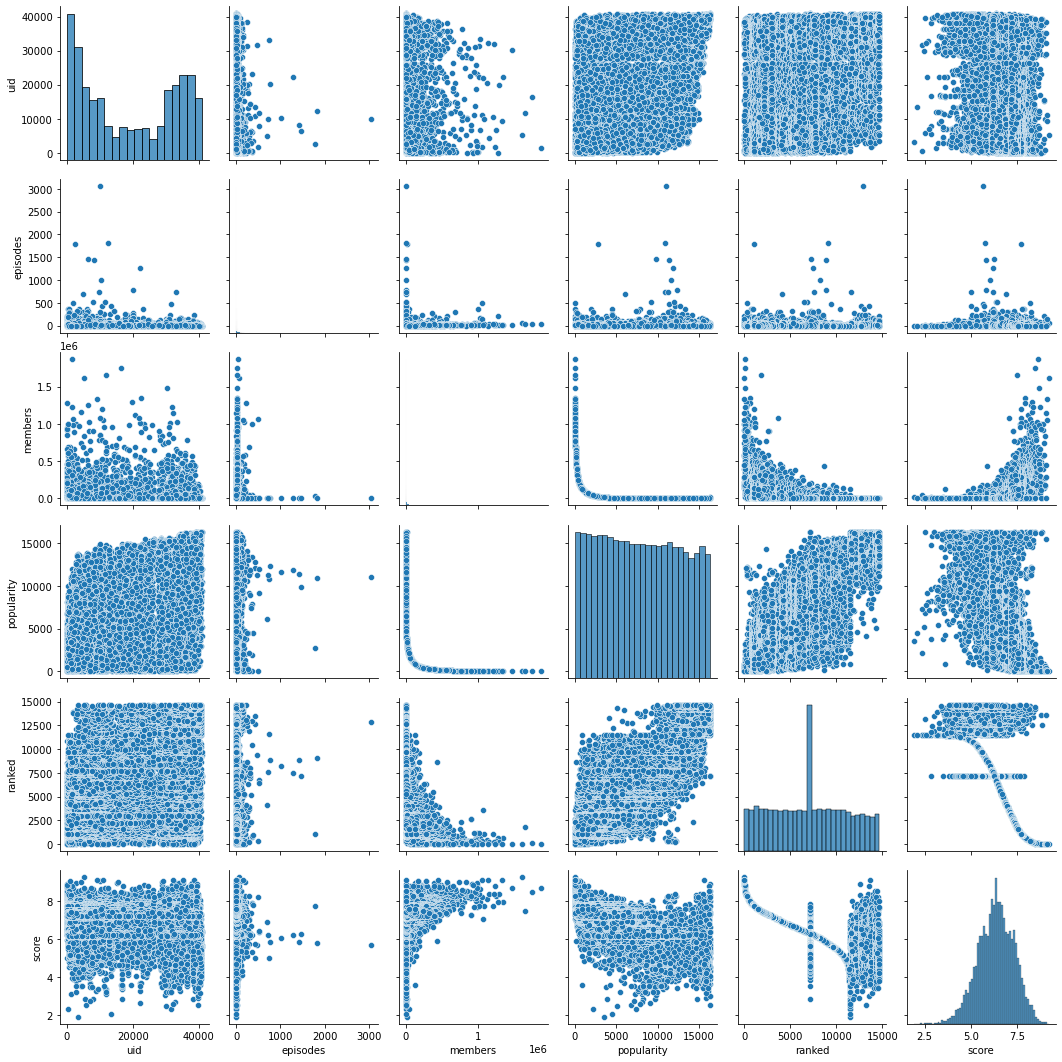

In [214]:
# visualizing features
sns.pairplot(anime_df)

In [277]:
# sorting by members
top_10_mem = anime_df.sort_values(by='members', ascending=False).head(10)
top_10_mem

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
740,1535,Death Note,"A shinigami, as a god of death, can kill any p...","['Mystery', 'Police', 'Psychological', 'Supern...","Oct 4, 2006 to Jun 27, 2007",37.0,1871043,1,52.0,8.65
681,16498,Shingeki no Kyojin,"Centuries ago, mankind was slaughtered to near...","['Action', 'Military', 'Mystery', 'Super Power...","Apr 7, 2013 to Sep 29, 2013",25.0,1754979,2,111.0,8.47
8409,11757,Sword Art Online,"In the year 2022, virtual reality has progress...","['Action', 'Adventure', 'Fantasy', 'Game', 'Ro...","Jul 8, 2012 to Dec 23, 2012",25.0,1657823,3,1771.0,7.49
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
16,30276,One Punch Man,The seemingly ordinary and unimpressive Saitam...,"['Action', 'Sci-Fi', 'Comedy', 'Parody', 'Supe...","Oct 5, 2015 to Dec 21, 2015",12.0,1475219,5,50.0,8.68
140,22319,Tokyo Ghoul,Tokyo has become a cruel and merciless city—a ...,"['Action', 'Mystery', 'Horror', 'Psychological...","Jul 4, 2014 to Sep 19, 2014",12.0,1346036,6,674.0,7.93
773,9253,Steins;Gate,The self-proclaimed mad scientist Rintarou Oka...,"['Thriller', 'Sci-Fi']","Apr 6, 2011 to Sep 14, 2011",24.0,1331710,7,2.0,9.11
592,19815,No Game No Life,No Game No Life is a surreal comedy that foll...,"['Game', 'Adventure', 'Comedy', 'Supernatural'...","Apr 9, 2014 to Jun 25, 2014",12.0,1291615,8,201.0,8.34
144,20,Naruto,"Moments prior to Naruto Uzumaki's birth, a hug...","['Action', 'Adventure', 'Comedy', 'Super Power...","Oct 3, 2002 to Feb 8, 2007",220.0,1280914,9,670.0,7.93
514,6547,Angel Beats!,Otonashi awakens only to learn he is dead. A r...,"['Action', 'Comedy', 'Drama', 'School', 'Super...","Apr 3, 2010 to Jun 26, 2010",13.0,1247282,10,284.0,8.25


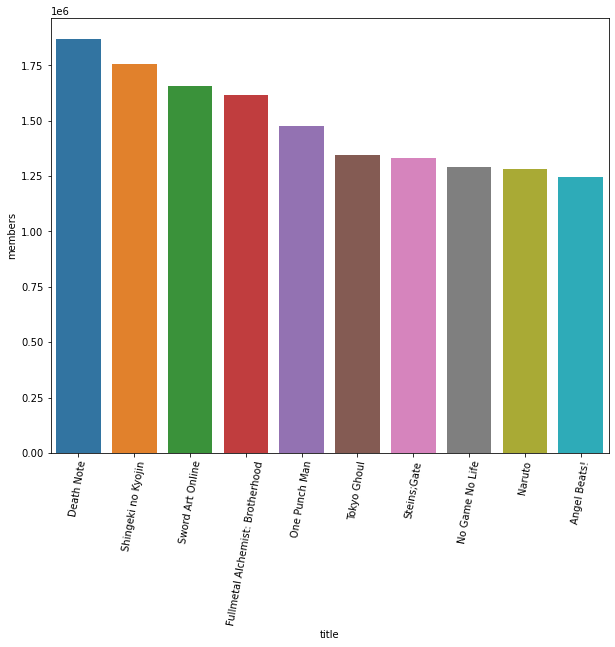

In [216]:
# visualizing top ten popular/members shows
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=top_10_mem, x='title', y='members')
plt.xticks(rotation=80);

In [254]:
# sorting by score
top_10_score = anime_df.sort_values(by='score', ascending=False).head(10)
top_10_score

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
772,11061,Hunter x Hunter (2011),Hunter x Hunter is set in a world where Hunte...,"['Action', 'Adventure', 'Fantasy', 'Shounen', ...","Oct 2, 2011 to Sep 24, 2014",148.0,1052761,20,3.0,9.11
773,9253,Steins;Gate,The self-proclaimed mad scientist Rintarou Oka...,"['Thriller', 'Sci-Fi']","Apr 6, 2011 to Sep 14, 2011",24.0,1331710,7,2.0,9.11
771,32281,Kimi no Na wa.,"Mitsuha Miyamizu, a high school girl, yearns t...","['Romance', 'Supernatural', 'School', 'Drama']","Aug 26, 2016",1.0,1139878,15,4.0,9.09
12771,35151,Quiz de Manabu Pinocchio no Koutsuu Ansen,Pinocchio learns about traffic safety.,['Kids'],Not available,1.0,90,15542,13630.0,9.08
770,38524,Shingeki no Kyojin Season 3 Part 2,Seeking to restore humanity’s diminishing hope...,"['Action', 'Drama', 'Fantasy', 'Military', 'My...","Apr 29, 2019 to Jul 1, 2019",10.0,446370,175,5.0,9.07
769,28977,Gintama°,"Gintoki, Shinpachi, and Kagura return as the f...","['Action', 'Comedy', 'Historical', 'Parody', '...","Apr 8, 2015 to Mar 30, 2016",51.0,281594,351,6.0,9.05
768,9969,Gintama',"After a one-year hiatus, Shinpachi Shimura ret...","['Action', 'Sci-Fi', 'Comedy', 'Historical', '...","Apr 4, 2011 to Mar 26, 2012",51.0,278110,353,7.0,9.04
767,820,Ginga Eiyuu Densetsu,The 150-year-long stalemate between the two in...,"['Military', 'Sci-Fi', 'Space', 'Drama']","Jan 8, 1988 to Mar 17, 1997",110.0,175423,620,8.0,9.03
766,35180,3-gatsu no Lion 2nd Season,"Now in his second year of high school, Rei Kir...","['Drama', 'Game', 'Seinen', 'Slice of Life']","Oct 14, 2017 to Mar 31, 2018",22.0,169544,657,9.0,9.02


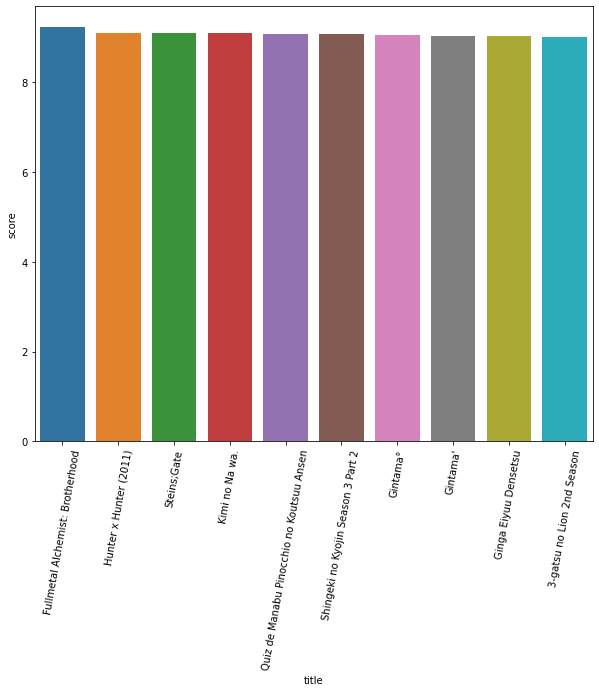

In [255]:
# visualizing by score
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=top_10_score, x='title', y='score')
plt.xticks(rotation=80);

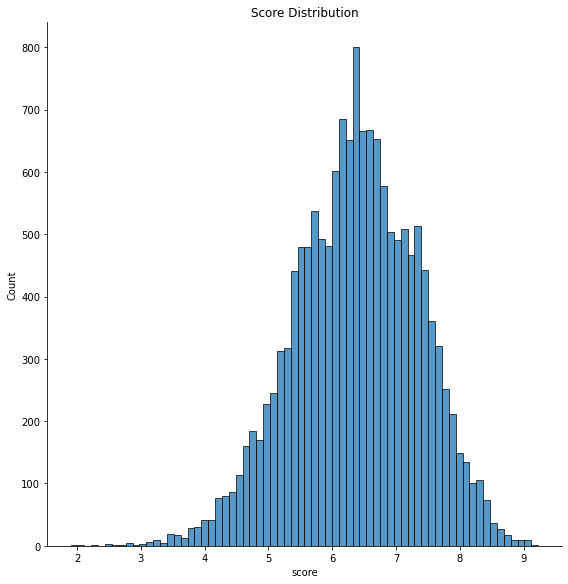

In [256]:
sns.displot(data=anime_df, x='score', kind='hist', height=8)
plt.title('Score Distribution')
plt.show;

From the above visuals, we can see the most popular animes based on the number of members as well as the top scored shows, which are normally distributed. 

In [278]:
# removing columns
anime_df.drop(columns=['aired','popularity', 'ranked'], inplace=True)

### Preparing to One-Hot-Encode Genre Column

In [279]:
from ast import literal_eval

# import to ohe genre column
from sklearn.preprocessing import MultiLabelBinarizer

In [281]:
anime_df['genre'] = anime_df['genre'].apply(literal_eval)

In [282]:
# isntantiating binarizer
binarizer = MultiLabelBinarizer()

# saving results to merge with original dataset
results = binarizer.fit_transform(anime_df['genre'])

In [283]:
# creating and saving new dataset for content based model
genre_df = anime_df.join(pd.DataFrame(results, index=anime_df.index, columns=binarizer.classes_))
genre_df

,uid,title,synopsis,genre,episodes,members,score,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]",25.0,489888,8.82,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]",22.0,995473,8.83,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",13.0,581663,8.83,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...",64.0,1615084,9.23,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]",1.0,214621,8.83,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"[Action, Comedy, Super Power, Martial Arts, Sh...",1.0,34155,7.50,1,0,0,...,0,0,0,0,1,0,0,0,0,0
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"[Slice of Life, Comedy, Supernatural]",12.0,61459,7.50,0,0,0,...,0,1,0,0,0,1,0,0,0,0
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","[Slice of Life, Comedy, Shounen]",12.0,67422,7.56,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",[Action],1.0,41077,7.56,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
# formating column names
anime_df.rename(columns={'uid':'UID', 'title':'Title', 'synopsis':'Synopsis', 'genre':'Genre', 'episodes':'Number of Episodes',
                        'members':'Number of Members', 'score':'Score'})
genre_df.rename(columns={'uid':'UID', 'title':'Title', 'synopsis':'Synopsis', 'genre':'Genre', 'episodes':'Number of Episodes',
                        'members':'Number of Members', 'score':'Score'})

,UID,Title,Synopsis,Genre,Number of Episodes,Number of Members,Score,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]",25.0,489888,8.82,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]",22.0,995473,8.83,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",13.0,581663,8.83,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...",64.0,1615084,9.23,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]",1.0,214621,8.83,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"[Action, Comedy, Super Power, Martial Arts, Sh...",1.0,34155,7.50,1,0,0,...,0,0,0,0,1,0,0,0,0,0
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"[Slice of Life, Comedy, Supernatural]",12.0,61459,7.50,0,0,0,...,0,1,0,0,0,1,0,0,0,0
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","[Slice of Life, Comedy, Shounen]",12.0,67422,7.56,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",[Action],1.0,41077,7.56,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
anime_df.to_csv('Data/anime_cleaned.csv')
genre_df.to_csv('Data/one_hot_genre.csv')

## Reviews Dataset

In [76]:
# looking into reviews df
display(ratings_df.head())
display(ratings_df.info())
display(ratings_df.describe())

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


None

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [77]:
ratings_df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [288]:
# users to test function later: 73512 and 73516
ratings_df.loc[ratings_df['user_id']==73512]

,user_id,anime_id,rating
7813492,73512,60,10
7813493,73512,98,8
7813494,73512,101,10
7813495,73512,120,5
7813496,73512,199,10
7813497,73512,226,9
7813498,73512,339,10
7813499,73512,355,-1
7813500,73512,552,7
7813501,73512,656,8


In [300]:
anime_df.loc[(anime_df['uid']==60) | (anime_df['uid']==98)| (anime_df['uid']==101)| (anime_df['uid']==199) | (anime_df['uid']==226)]

,uid,title,synopsis,genre,episodes,members,score
6,199,Sen to Chihiro no Kamikakushi,"Stubborn, spoiled, and naïve, 10-year-old Chih...","[Adventure, Supernatural, Drama]",1.0,913212,8.90
1023,60,Chrno Crusade,The 1920s was a decade of great change and uph...,"[Action, Demons, Historical, Romance, Shounen,...",24.0,182796,7.73
3112,60,Chrno Crusade,The 1920s was a decade of great change and uph...,"[Action, Demons, Historical, Romance, Shounen,...",24.0,182751,7.73
3416,226,Elfen Lied,Lucy is a special breed of human referred to a...,"[Action, Horror, Psychological, Supernatural, ...",13.0,993395,7.69
15373,98,Mai-HiME,"Thirteen girls, each with the ability to mater...","[Action, Comedy, Drama, Fantasy, Magic, Mecha,...",26.0,94308,7.51
18633,101,Air,Yukito Kunisaki is on a journey in search of t...,"[Slice of Life, Supernatural, Drama, Romance]",12.0,236436,7.38


In [289]:
ratings_df.loc[ratings_df['user_id']==73516]

,user_id,anime_id,rating
7813735,73516,790,9
7813736,73516,8074,9


In [301]:
anime_df.loc[(anime_df['uid']==790) | (anime_df['uid']==8074)]

,uid,title,synopsis,genre,episodes,members,score
179,790,Ergo Proxy,Within the domed city of Romdo lies one of the...,"[Psychological, Mystery, Sci-Fi]",23.0,406663,7.96
17790,8074,Highschool of the Dead,It happened suddenly: The dead began to rise a...,"[Action, Horror, Supernatural, Ecchi, Shounen]",12.0,900207,7.28


In [78]:
# looking into scores
ratings_df['rating'].value_counts().sort_values()

 1       16649
 2       23150
 3       41453
 4      104291
 5      282806
 6      637775
 10     955715
 9     1254096
 7     1375287
-1     1476496
 8     1646019
Name: rating, dtype: int64

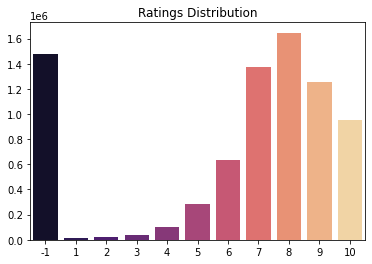

In [79]:
count = ratings_df['rating'].value_counts().sort_index()

sns.barplot(x=count.index,
            y=count.values,
            palette='magma').set_title('Ratings Distribution');

In [80]:
ratings_df.loc[ratings_df['rating']==-1]

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813628,73515,2385,-1
7813629,73515,2386,-1
7813631,73515,2490,-1
7813635,73515,2680,-1


In [81]:
ratings_df = ratings_df.loc[ratings_df['rating'] > -1]
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337241 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


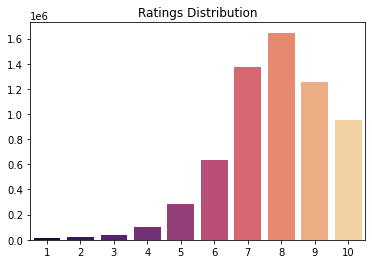

In [82]:
count = ratings_df['rating'].value_counts().sort_index()

sns.barplot(x=count.index,
            y=count.values,
            palette='magma').set_title('Ratings Distribution')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#plt.savefig('Images/ratings_dist.png', dpi=400);

In [83]:
# saving df to use for collaborative filtering
ratings_df.to_csv('Data/cleaned_reviews.csv')

After cleaning both datasets, I will build a content-based and collaboritve filtering models in separte notebooks. 